In [1]:
from qiskit import QuantumCircuit, transpile, ClassicalRegister, QuantumRegister
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import QasmSimulator
from qiskit.visualization import plot_histogram
from IPython.display import display

In [2]:
def oracle_constant0(qc: QuantumCircuit):
    # f(x)=0 for all x: do nothing
    pass

def oracle_constant1(qc: QuantumCircuit):
    # f(x)=1 for all x: flip the ancilla
    qc.x(1)

def oracle_balanced_x(qc: QuantumCircuit):
    # f(x)=x: CNOT(input→ancilla)
    qc.cx(0, 1)

def oracle_balanced_notx(qc: QuantumCircuit):
    # f(x)=¬x: X–CNOT–X on input
    qc.x(0)
    qc.cx(0, 1)
    qc.x(0)

ORACLES = {
    "constant0":      oracle_constant0,
    "constant1":      oracle_constant1,
    "balanced_x":     oracle_balanced_x,
    "balanced_notx":  oracle_balanced_notx,
}


In [3]:
def dj_1bit_circuit(oracle_fn: callable) -> QuantumCircuit:
    """
    Build the 1-qubit DJ circuit:
      • ancilla in |1⟩
      • H on both qubits
      • oracle
      • H on input qubit
      • measure input qubit
    """
    qc = QuantumCircuit(2, 1)
    # prepare ancilla in |1⟩
    qc.x(1)
    # create superposition on both qubits
    qc.h([0, 1])
    qc.barrier()

    # oracle call
    oracle_fn(qc)
    qc.barrier()

    # final Hadamard on the query qubit
    qc.h(0)
    # measure query -> classical bit 0
    qc.measure(0, 0)
    return qc

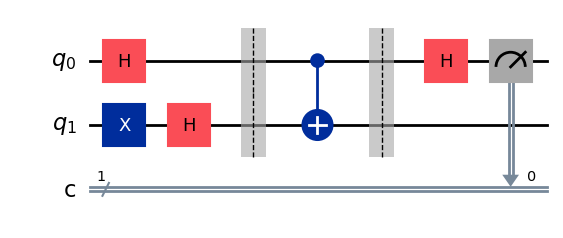

In [ ]:

oracle = oracle_balanced_notx

qc = dj_1bit_circuit(oracle)
display(qc.draw('mpl'))


In [5]:
# -----------------------------------------------------------------------------
# 4) Simulate locally on Aer
# -----------------------------------------------------------------------------
# a) set up simulator & pass manager
sim = QasmSimulator()

# b) compile & run
# compiled = transpile(qc, sim, pass_manager=pm)
job = sim.run(qc, backend=sim,shots=512)
result = job.result()
counts = result.get_counts(qc)

Counts: {'1': 512}


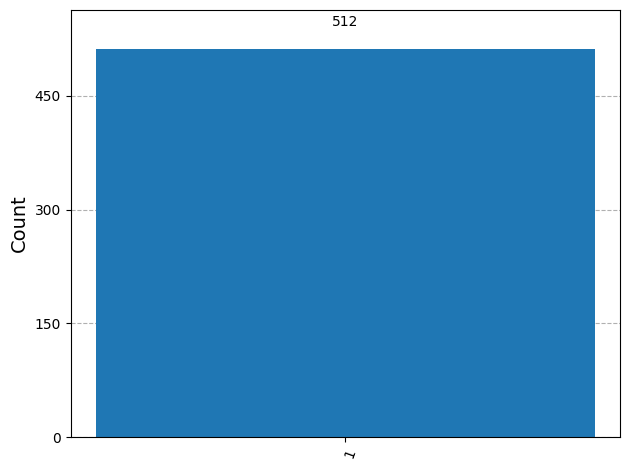

In [6]:
# c) display the result
print("Counts:", counts)
fig = plot_histogram(counts)
display(fig)